# Initialize

In [1]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-11 11:31:55.724275: Importing os...
2024-04-11 11:31:55.724517: Importing sys...
Visible devices: [2]
2024-04-11 11:31:55.725029: Importing timer from timeit...
2024-04-11 11:31:55.725168: Setting env variables for tf import (only device(s) [2] will be available)...
2024-04-11 11:31:55.725427: Importing numpy...
2024-04-11 11:31:55.903765: Importing matplotlib...
2024-04-11 11:31:56.299170: Importing h5py...
2024-04-11 11:31:56.322506: Importing importlib.util...
2024-04-11 11:31:56.322625: Importing json...
2024-04-11 11:31:56.322697: Importing pandas...
2024-04-11 11:31:56.642224: Importing random...
2024-04-11 11:31:56.642408: Importing scipy utils...
2024-04-11 11:31:56.971709: Importing subprocess...
2024-04-11 11:31:56.971877: Importing tensorflow...
Tensorflow version: 2.12.0
2024-04-11 11:31:59.497571: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-04-11 11:31:59.780080: Importing timeit...
2024-04-11 11:31:59.780188: Importing tqdm...
2

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 10_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [4]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [5]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [6]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 10_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [7]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,10000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,100000000,False,10


In [8]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 100,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 100",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 200,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_10K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key

### Evaluate null hypotheses

In [9]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results/100D_10K/null_hypothesis/FN.json
Loading fpd from ../results/100D_10K/null_hypothesis/FPD.json
Loading kpd from ../results/100D_10K/null_hypothesis/KPD.json
Loading ks from ../results/100D_10K/null_hypothesis/KS.json
Loading sks from ../results/100D_10K/null_hypothesis/SKS.json
Loading swd from ../results/100D_10K/null_hypothesis/SWD.json


In [10]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.9190262949972976], [0.95, [9500, 500], 1.163020209902126], [0.99, [9900, 100], 1.3179537521716542]]
Computing time for metric fn: 57.411640834994614
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.6036749559820052], [0.95, [9500, 500], 0.9021833572706343], [0.99, [9900, 100], 1.1125954730711616]]
Computing time for metric fpd: 2185.895254447998
ThresholdS for metric kpd: [[0.68, [6800, 3199], 0.11970312191067478], [0.95, [9500, 500], 0.2943532073267363], [0.99, [9900, 100], 0.43340664928592787]]
Computing time for metric kpd: 2971.5029169970003
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9079254824033599], [0.95, [9500, 500], 1.0917025163565652], [0.99, [9900, 100], 1.2237900652401308]]
Computing time for metric ks: 651.6829978120004
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.903803078077085], [0.95, [9500, 500], 1.0769097338066926], [0.99, [9900, 100], 1.1813566708429235]]
Computing time for metric sks: 8442.330510033


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f5adcf2b520>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f5ad2771990>,"lambda ns, ndims: 100","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 0.6036749559820052], [0...."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f5ad27709d0>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.11970312191067478], [0..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5ad2771a20>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9079254824033599], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5ad2771ab0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9..."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5ad2771b40>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f5ad2771bd0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.8432326548410783 +/- 0.0003337879816711959
sigma = 0.18269865398278004 +/- 0.0013402342789156528


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


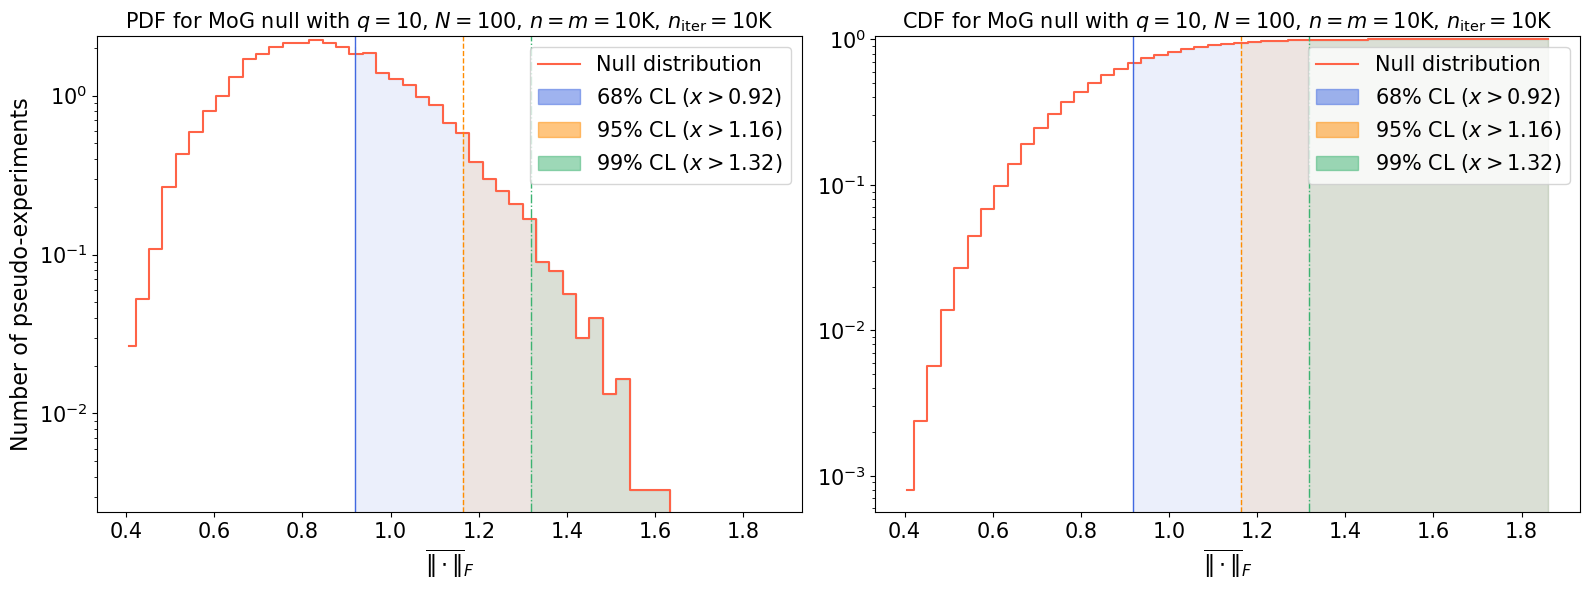

Time elapsed: 1.3234877350041643 seconds.
mu = 0.5321954252009057 +/- 0.0004067796899928917
sigma = 0.20168780081920962 +/- 0.001713104636534744


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


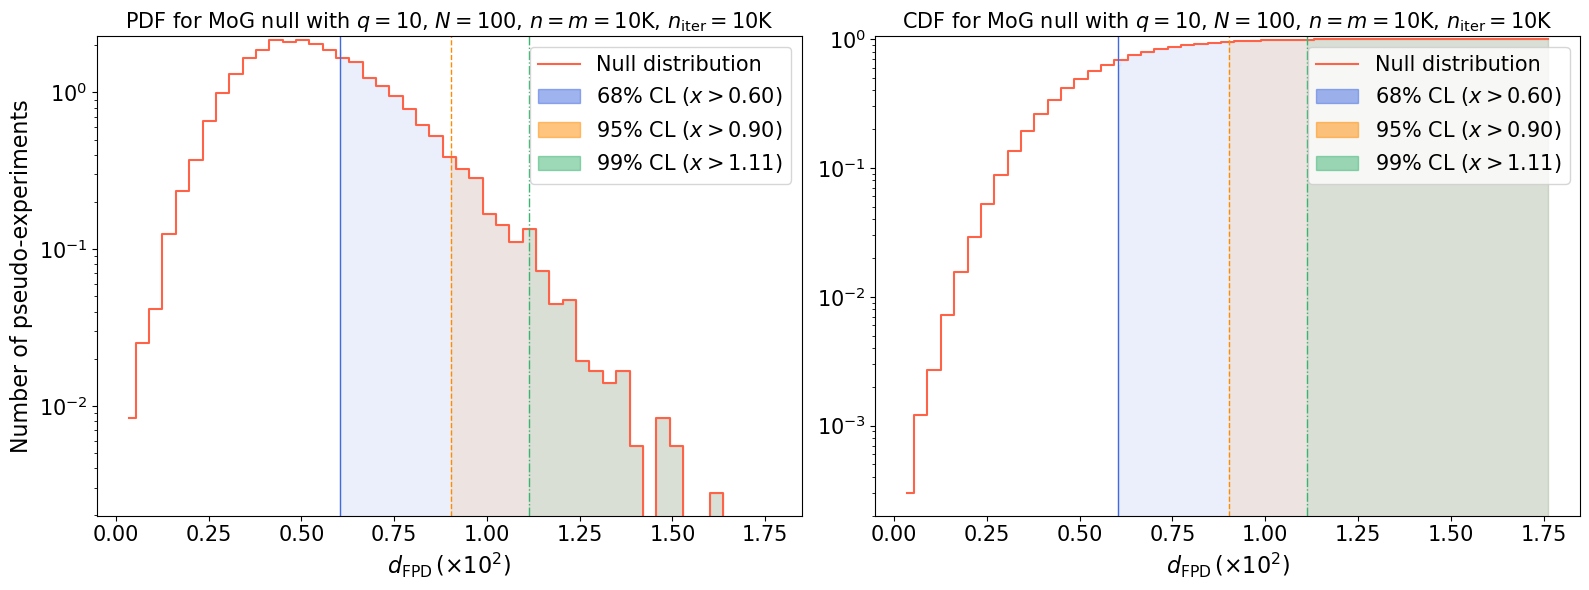

Time elapsed: 1.322546142997453 seconds.
mu = 0.09472187925249394 +/- 0.00010712782631653952
sigma = 0.10350257306779359 +/- 0.0012114726162051007


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


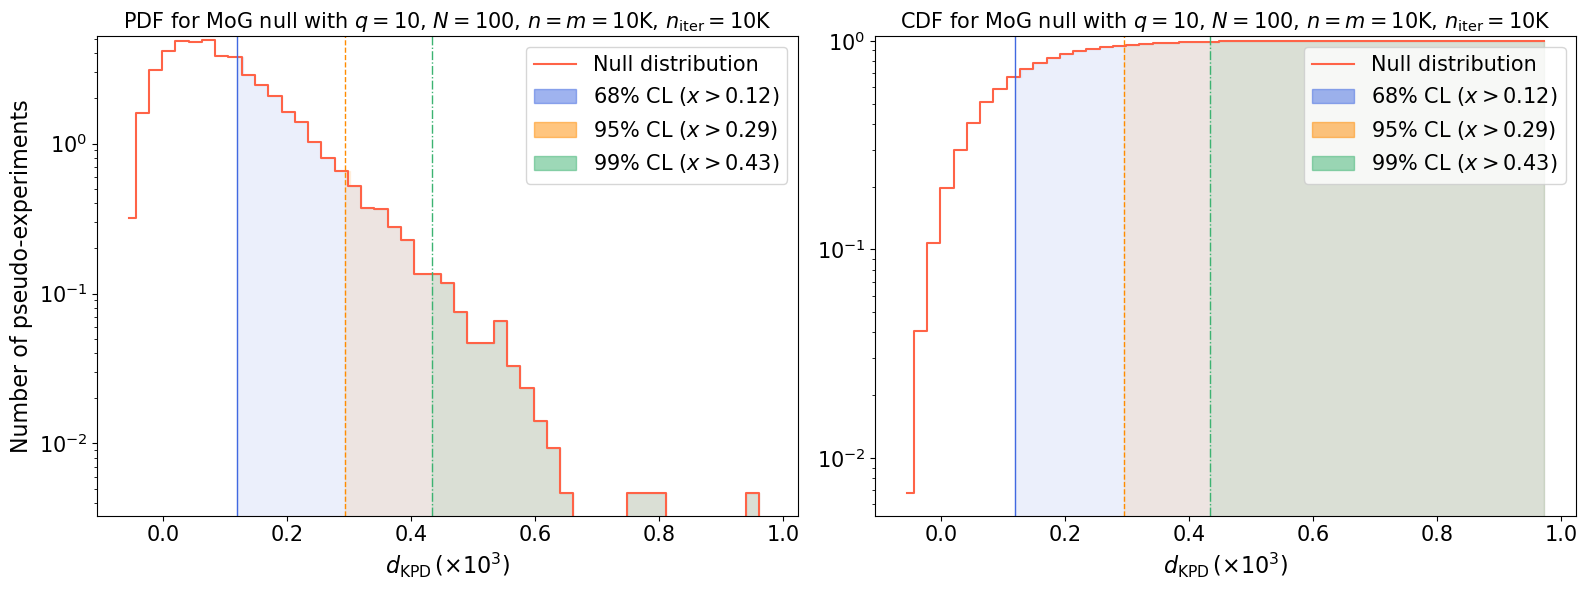

Time elapsed: 1.327327182982117 seconds.
mu = 0.8648679427361023 +/- 0.00015311768886595555
sigma = 0.12374073252811928 +/- 0.0010319355671157698


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


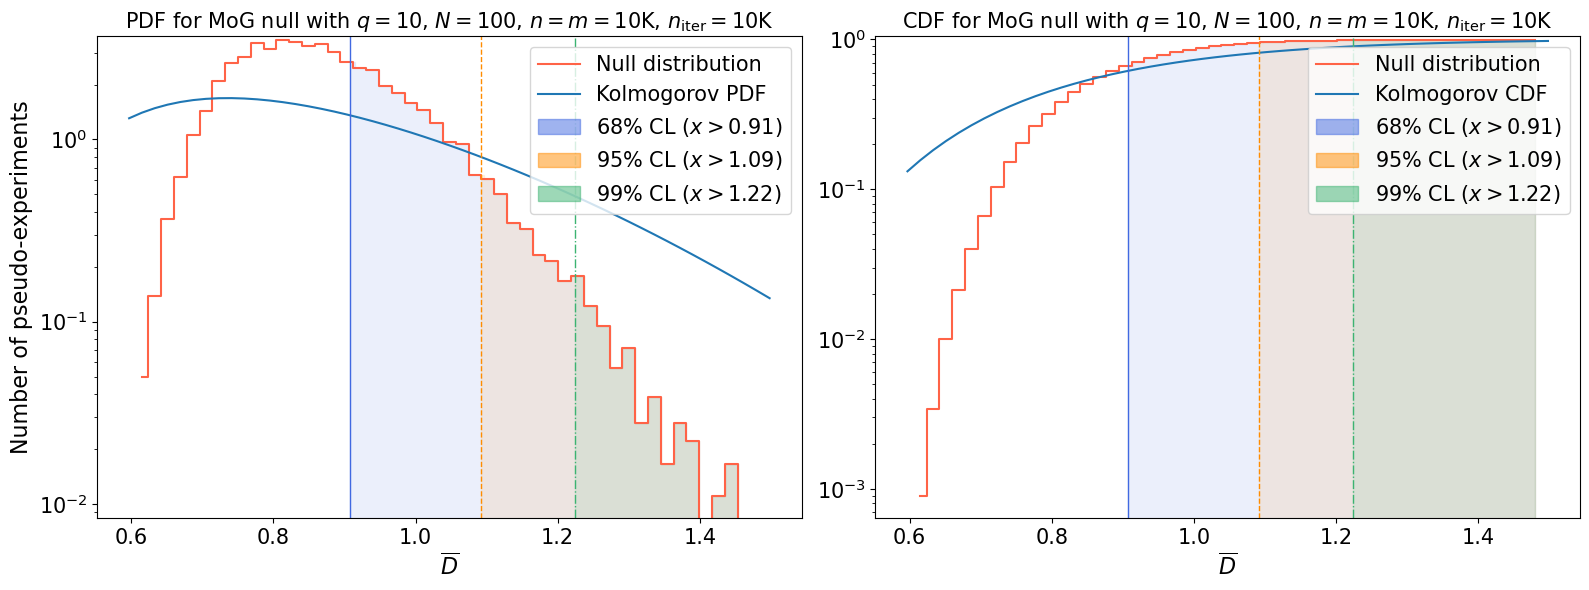

Time elapsed: 1.6533133749908302 seconds.
mu = 0.864318154218513 +/- 0.00012835307403313297
sigma = 0.11329301568637537 +/- 0.0009140666435986401


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


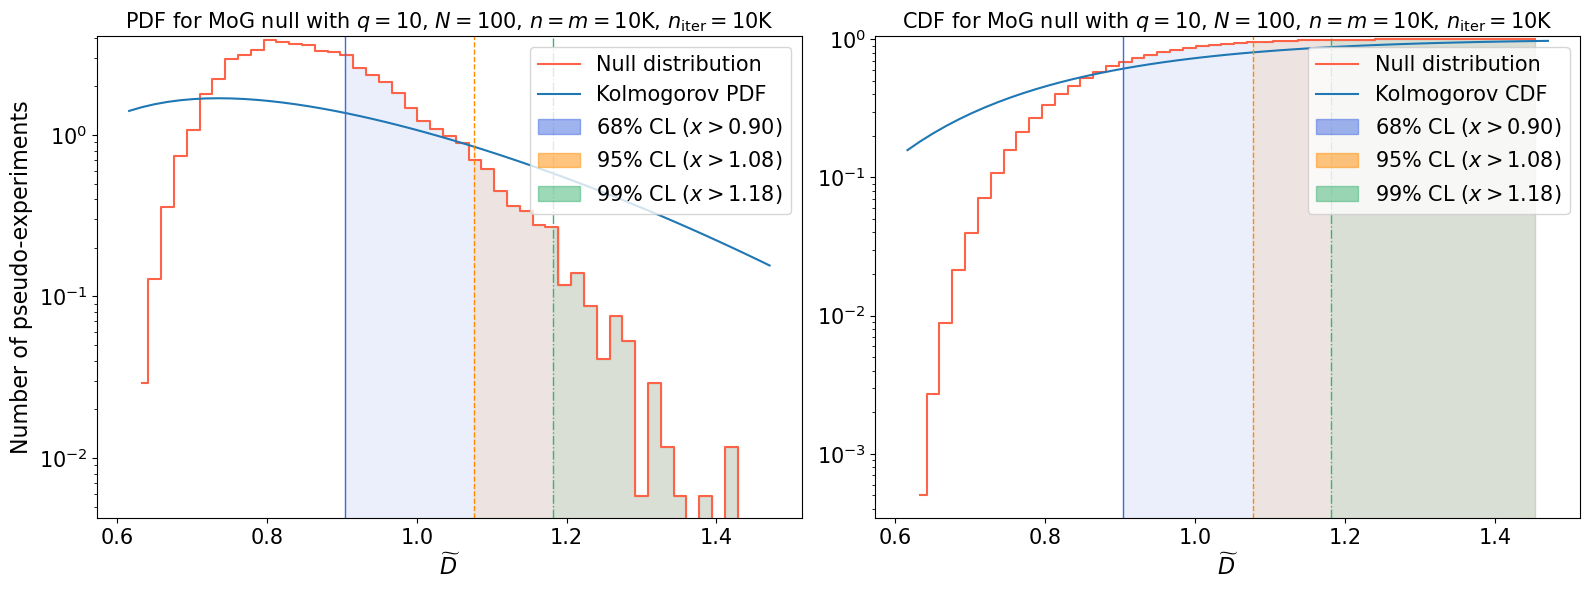

Time elapsed: 1.3127163099998143 seconds.
mu = 0.2983922542478831 +/- 3.66893712608093e-05
sigma = 0.06057175188221759 +/- 0.0004637608702027067


/tmp/ipykernel_16606/414440336.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_16606/414440336.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_16606/414440336.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_16606/414440336.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


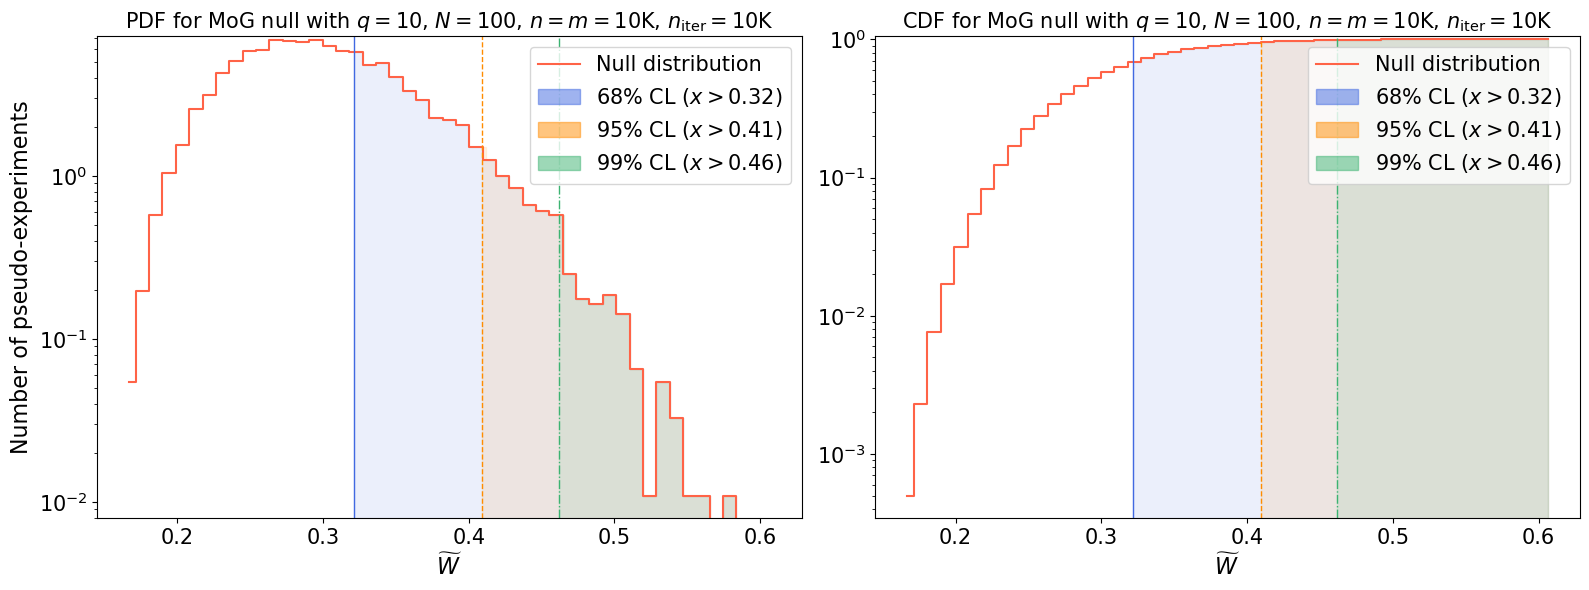

Time elapsed: 0.9823835769784637 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f5adcf2b520>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 10000, 'ba...",200,$\overline{\|\cdot\|}_{F}$,../results/100D_10K/null_hypothesis/FN.json,"[[0.68, [6800, 3199], 0.9190262949972976], [0....",../results/100D_10K/null_hypothesis/FN.pdf
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f5ad2771990>,"lambda ns, ndims: 100","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$d_{\mathrm{FPD}}$,../results/100D_10K/null_hypothesis/FPD.json,"[[0.68, [6800, 3199], 0.6036749559820052], [0....",../results/100D_10K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f5ad27709d0>,"lambda ns, ndims: 1000","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10,$d_{\mathrm{KPD}}$,../results/100D_10K/null_hypothesis/KPD.json,"[[0.68, [6800, 3199], 0.11970312191067478], [0...",../results/100D_10K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f5ad2771a20>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",10000,$\overline{D}$,../results/100D_10K/null_hypothesis/KS.json,"[[0.68, [6800, 3199], 0.9079254824033599], [0....",../results/100D_10K/null_hypothesis/KS.pdf
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5ad2771ab0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{D}$,../results/100D_10K/null_hypothesis/SKS.json,"[[0.68, [6800, 3199], 0.903803078077085], [0.9...",../results/100D_10K/null_hypothesis/SKS.pdf
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f5ad2771b40>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$\widetilde{W}$,../results/100D_10K/null_hypothesis/SWD.json,"[[0.68, [6800, 3199], 0.3215222675610459], [0....",../results/100D_10K/null_hypothesis/SWD.pdf
6,lr,LRMetric,GMetrics.LRMetric,"{'null_test': True, 'verbose': True}",lik_ratio_norm_list,<function <lambda> at 0x7f5ad2771bd0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 10000, 'ba...",50,$t_{\mu}$,../results/100D_10K/null_hypothesis/LR.json,"[[0.0025, mean, [[0.95, [9500, 500], -159060.1...",NaN


In [24]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{2})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{3})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [16]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.005,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10

### Show and save results

In [17]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [18]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [19]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,100,10000,10000,0.00001,0.00001,4213
9,ks,mean,100,10000,10000,0.00414,0.00759,617
12,sks,mean,100,10000,10000,0.06134,0.08154,834
15,swd,mean,100,10000,10000,0.08698,0.11906,603
0,fn,mean,100,10000,10000,0.09430,0.12604,356
3,fpd,mean,100,10000,10000,0.10284,0.13333,486
6,kpd,mean,100,10000,10000,0.20569,0.27533,458


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00001,0.00001,4213
9,ks,0.00414,0.00759,617
12,sks,0.06134,0.08154,834
15,swd,0.08698,0.11906,603
0,fn,0.09430,0.12604,356
3,fpd,0.10284,0.13333,486
6,kpd,0.20569,0.27533,458


In [20]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,100,10000,10000,0.00001,0.00002,4049
10,ks,std,100,10000,10000,0.00950,0.02313,578
4,fpd,std,100,10000,10000,0.36011,0.44960,405
13,sks,std,100,10000,10000,0.44556,0.54563,712
16,swd,std,100,10000,10000,0.52979,0.63237,481
1,fn,std,100,10000,10000,0.75439,0.89122,254
7,kpd,std,100,10000,10000,3.70117,4.36073,284


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00001,0.00002,4049
10,ks,0.00950,0.02313,578
4,fpd,0.36011,0.44960,405
13,sks,0.44556,0.54563,712
16,swd,0.52979,0.63237,481
1,fn,0.75439,0.89122,254
7,kpd,3.70117,4.36073,284


In [21]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,100,10000,10000,0.00000,0.00001,4309
11,ks,both,100,10000,10000,0.00346,0.00596,678
14,sks,both,100,10000,10000,0.06027,0.08047,1041
17,swd,both,100,10000,10000,0.08575,0.11785,618
2,fn,both,100,10000,10000,0.09430,0.12604,330
5,fpd,both,100,10000,10000,0.09857,0.12789,468
8,kpd,both,100,10000,10000,0.20447,0.27589,462


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00000,0.00001,4309
11,ks,0.00346,0.00596,678
14,sks,0.06027,0.08047,1041
17,swd,0.08575,0.11785,618
2,fn,0.09430,0.12604,330
5,fpd,0.09857,0.12789,468
8,kpd,0.20447,0.27589,462


In [22]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00001,0.00001,4213,0.00001,0.00002,4049,0.00000,0.00001,4309,-
1,$\overline{D}$,0.00414,0.00759,617,0.00950,0.02313,578,0.00346,0.00596,678,651
2,$\widetilde{D}$,0.06134,0.08154,834,0.44556,0.54563,712,0.06027,0.08047,1041,8442
3,$\widetilde{W}$,0.08698,0.11906,603,0.52979,0.63237,481,0.08575,0.11785,618,5075
4,$\overline{\|\cdot\|}_{F}$,0.09430,0.12604,356,0.75439,0.89122,254,0.09430,0.12604,330,57
5,$d_{\mathrm{FPD}}$,0.10284,0.13333,486,0.36011,0.44960,405,0.09857,0.12789,468,2185
6,$d_{\mathrm{KPD}}$,0.20569,0.27533,458,3.70117,4.36073,284,0.20447,0.27589,462,2971


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 1e-05 & 1e-05 & 4213 & 1e-05 & 2e-05 & 4049 & 0 & 1e-05 & 4309 & - \\
$\overline{D}$ & 0.0041 & 0.0076 & 617 & 0.0095 & 0.023 & 578 & 0.0035 & 0.006 & 678 & 651 \\
$\widetilde{D}$ & 0.061 & 0.082 & 834 & 0.45 & 0.55 & 712 & 0.06 & 0.08 & 1041 & 8442 \\
$\widetilde{W}$ & 0.087 & 0.12 & 603 & 0.53 & 0.63 & 481 & 0.086 & 0.12 & 618 & 5075 \\
$\overline{\|\cdot\|}_{F}$ & 0.094 & 0.13 & 356 & 0.75 & 0.89 & 254 & 0.094 & 0.13 & 330 & 57 \\
$d_{\mathrm{FPD}}$ & 0.1 & 0.13 & 486 & 0.36 & 0.45 & 405 & 0.099 & 0.13 & 468 & 2185 \\
$d_{\mathrm{KPD}}$ & 0.21 & 0.28 & 458 & 3.7 & 4.4 & 284 & 0.2

# Fixed $n=20000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 10
ndims = 100
niter = 10_000
batch_size_test = 20_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
null_hypotheses_dir = model_dir + "null_hypothesis/"
metrics_config_file = model_dir + "metrics_config.json"

In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 200000000
batch_size 20000
niter 10000
niter * batch_size 200000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 1000,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 1000,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 10_000,
                               num_batches = 1,
                               batch_size = 20_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,20000,10000,10000000,float64,0,True,False,None,True,...,100,0,True,100,0,float64,100,200000000,False,10


In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                       "object_name": "FNMetric",
                                       "class_name": "GMetrics.FNMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100,
                                       "latex": "$\overline{\|\cdot\|}_{F}$",
                                       "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1,
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 5000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 1000, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 20000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 100,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 100,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 100,
   'nsamples': 200000000,
   'small_sample': False,
   'ncomp': 10},
  'max_vectorize': 100,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results/100D_20K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_key

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Computing and savng fn with max_vectorize = 100

------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 10000
batch_size = 20000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 100
Iterating from 0 to 100 out of 10000 .


Iterating from 100 to 200 out of 10000 .
Iterating from 200 to 300 out of 10000 .
Iterating from 300 to 400 out of 10000 .
Iterating from 400 to 500 out of 10000 .
Iterating from 500 to 600 out of 10000 .
Iterating from 600 to 700 out of 10000 .
Iterating from 700 to 800 out of 10000 .
Iterating from 800 to 900 out of 10000 .
Iterating from 900 to 1000 out of 10000 .
Iterating from 1000 to 1100 out of 10000 .
Iterating from 1100 to 1200 out of 10000 .
Iterating from 1200 to 1300 out of 10000 .
Iterating from 1300 to 1400 out of 10000 .
Iterating from 1400 to 1500 out of 10000 .
Iterating from 1500 to 1600 out of 10000 .
Iterating from 1600 to 1700 out of 10000 .
Iterating from 1700 to 1800 out of 10000 .
Iterating from 1800 to 1900 out of 10000 .
Iterating from 1900 to 2000 out of 10000 .
Iterating from 2000 to 2100 out of 10000 .
Iterating from 2100 to 2200 out of 10000 .
Iterating from 2200 to 2300 out of 10000 .
Iterating from 2300 to 2400 out of 10000 .
Iterating from 2400 to 2500 

In [ ]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fpd: [[0.68, [680, 319], 0.29537958352228516], [0.95, [950, 50], 0.4343605185264254], [0.99, [990, 10], 0.5245307367834645]]
Computing time for metric fpd: 453.6071266870131
ThresholdS for metric kpd: [[0.68, [680, 319], 0.05878963351912958], [0.95, [950, 50], 0.1385738795460778], [0.99, [990, 10], 0.20502084467532988]]
Computing time for metric kpd: 4377.339911496994


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7faedc778ca0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 1000, 'batch_size_test': 20000, 'bat...",100,$\overline{\|\cdot\|}_{F}$,../results/100D_20K/null_hypothesis/FN.json,NaN
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7faedc778af0>,"lambda ns, ndims: 100","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$d_{\mathrm{FPD}}$,../results/100D_20K/null_hypothesis/FPD.json,"[[0.68, [680, 319], 0.29537958352228516], [0.9..."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7faedc778d30>,"lambda ns, ndims: 1000","{'niter': 1000, 'batch_size_test': 20000, 'bat...",1,$d_{\mathrm{KPD}}$,../results/100D_20K/null_hypothesis/KPD.json,"[[0.68, [680, 319], 0.05878963351912958], [0.9..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7faedc779cf0>,"lambda ns, _: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",5000,$\overline{D}$,../results/100D_20K/null_hypothesis/KS.json,NaN
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faedc779d80>,"lambda ns, _: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$\widetilde{D}$,../results/100D_20K/null_hypothesis/SKS.json,NaN
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faedc779bd0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$\widetilde{W}$,../results/100D_20K/null_hypothesis/SWD.json,NaN
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7faedc778940>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$t_{\mu}$,../results/100D_20K/null_hypothesis/LR.json,[]


### Plots of null-distributions

mu = 0.25783807600947295 +/- 0.00030013224664508694
sigma = 0.09742184039843964 +/- 0.002201262596971096


/tmp/ipykernel_24282/1572162660.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_24282/1572162660.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_24282/1572162660.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_24282/1572162660.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


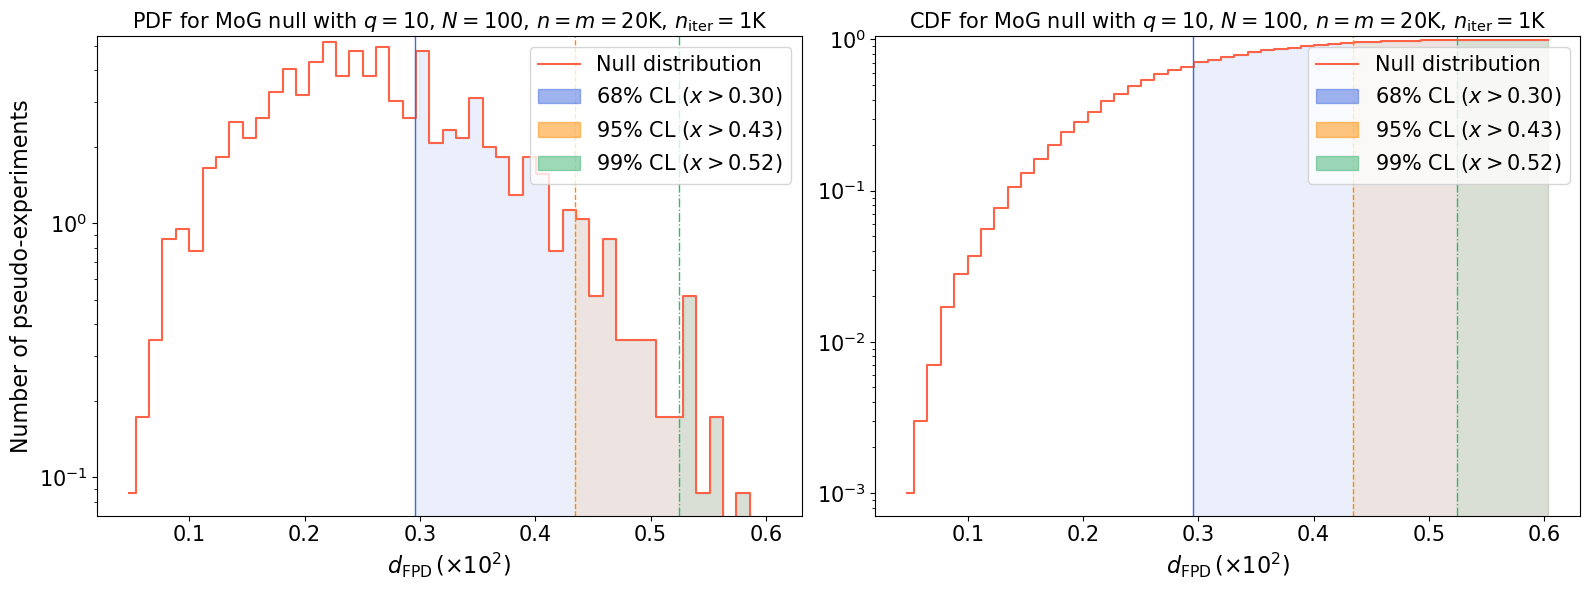

Time elapsed: 1.5422541520092636 seconds.
mu = 0.04239180734520365 +/- 8.021373529611543e-05
sigma = 0.05036448184639306 +/- 0.0014233696724983524


/tmp/ipykernel_24282/1572162660.py:82: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_24282/1572162660.py:84: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_24282/1572162660.py:121: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_24282/1572162660.py:127: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


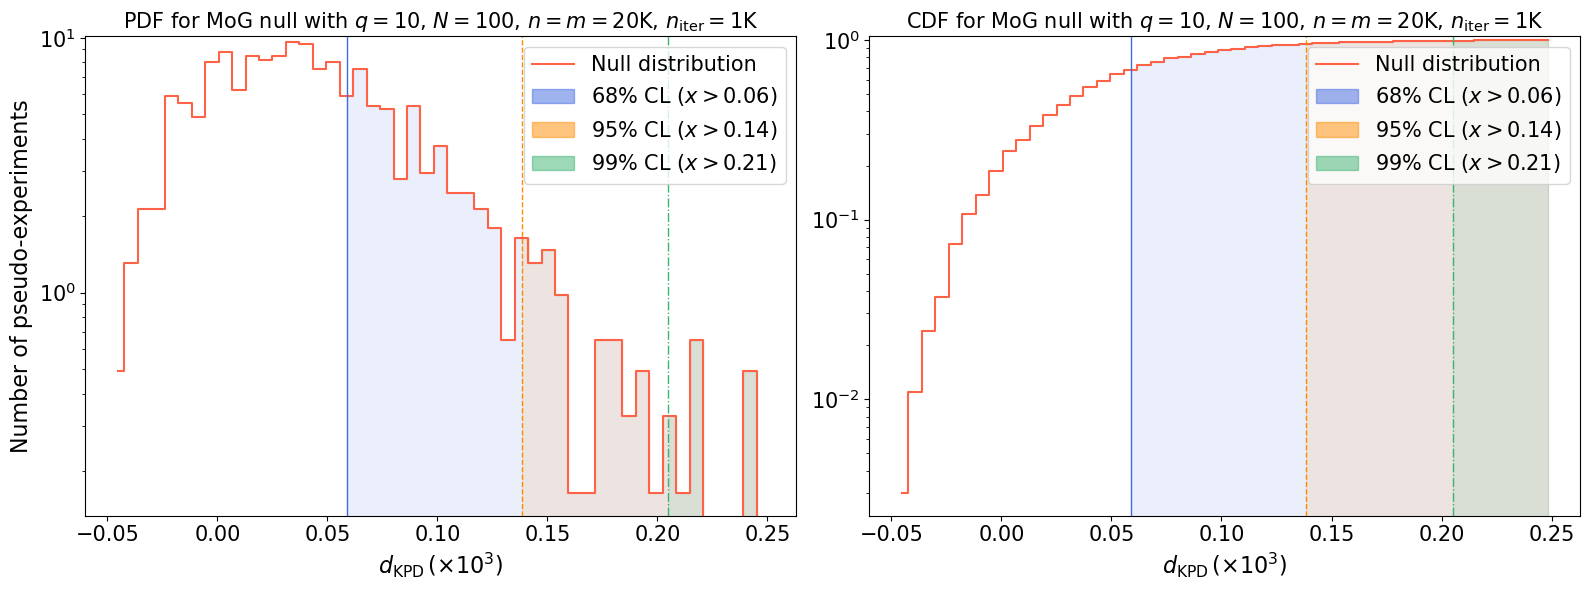

Time elapsed: 2.0254199280170724 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7faedc778ca0>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 1000, 'batch_size_test': 20000, 'bat...",100,$\overline{\|\cdot\|}_{F}$,../results/100D_20K/null_hypothesis/FN.json,NaN,NaN
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7faedc778af0>,"lambda ns, ndims: 100","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$d_{\mathrm{FPD}}$,../results/100D_20K/null_hypothesis/FPD.json,"[[0.68, [680, 319], 0.29537958352228516], [0.9...",../results/100D_20K/null_hypothesis/FPD.pdf
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7faedc778d30>,"lambda ns, ndims: 1000","{'niter': 1000, 'batch_size_test': 20000, 'bat...",1,$d_{\mathrm{KPD}}$,../results/100D_20K/null_hypothesis/KPD.json,"[[0.68, [680, 319], 0.05878963351912958], [0.9...",../results/100D_20K/null_hypothesis/KPD.pdf
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7faedc779cf0>,"lambda ns, _: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",5000,$\overline{D}$,../results/100D_20K/null_hypothesis/KS.json,NaN,NaN
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faedc779d80>,"lambda ns, _: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$\widetilde{D}$,../results/100D_20K/null_hypothesis/SKS.json,NaN,NaN
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 1000, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7faedc779bd0>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$\widetilde{W}$,../results/100D_20K/null_hypothesis/SWD.json,NaN,NaN
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7faedc778940>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 1000, 'batch_size_test': 20000, 'bat...",20,$t_{\mu}$,../results/100D_20K/null_hypothesis/LR.json,[],NaN


In [ ]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    if "FPD" in latex:
        latex = r"$d_{\mathrm{FPD}}\,(\times 10^{3})$"
    elif "KPD" in latex:
        latex = r"$d_{\mathrm{KPD}}\,(\times 10^{4})$"
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [ ]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [ ]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Exclusion limits for fn with mean deformation already loaded.
Exclusion limits for fn with std deformation already loaded.
Exclusion limits for fn with both deformation already loaded.
Exclusion limits for fpd with mean deformation already loaded.
Exclusion limits for fpd with std deformation already loaded.
Exclusion limits for fpd with both deformation already loaded.
Exclusion limits for kpd with mean deformation already loaded.
Exclusion limits for kpd with std deformation already loaded.
Exclusion limits for kpd with both deformation already loaded.
Exclusion limits for ks with mean deformation already loaded.
Exclusion limits for ks with std deformation already loaded.
Exclusion limits for ks with both deformation already loaded.
Exclusion limits for sks with mean deformation already loaded.
Exclusion limits for sks with std deformation already loaded.
Exclusion limits for sks with both deformation already loaded.
Exclusion limits for swd with mean deformation already loaded.
Exc

### Likelihood-ratio test

In [ ]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [ ]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.005,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.0025
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
nchunks = 200
Iterating from 0 to 50 out of 10000 .
Iterating from 50 to 100 out of 10000 .
Iterating from 100 to 150 out of 10000 .
Iterating from 150 to 200 out of 10000 .
Iterating from 200 to 250 out of 10000 .
Iterating from 250 to 300 out of 10000 .
Iterating from 300 to 350 out of 10000 .
Iterating from 350 to 400 out of 10

### Show and save results

In [ ]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [ ]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [ ]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,100,10000,10000,0.00001,0.00001,4213
9,ks,mean,100,10000,10000,0.00414,0.00759,617
12,sks,mean,100,10000,10000,0.06134,0.08154,834
15,swd,mean,100,10000,10000,0.08698,0.11906,603
0,fn,mean,100,10000,10000,0.09430,0.12604,356
3,fpd,mean,100,10000,10000,0.10284,0.13333,486
6,kpd,mean,100,10000,10000,0.20569,0.27533,458


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00001,0.00001,4213
9,ks,0.00414,0.00759,617
12,sks,0.06134,0.08154,834
15,swd,0.08698,0.11906,603
0,fn,0.09430,0.12604,356
3,fpd,0.10284,0.13333,486
6,kpd,0.20569,0.27533,458


In [ ]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,100,10000,10000,0.00001,0.00002,4049
10,ks,std,100,10000,10000,0.00950,0.02313,578
4,fpd,std,100,10000,10000,0.36011,0.44960,405
13,sks,std,100,10000,10000,0.44556,0.54563,712
16,swd,std,100,10000,10000,0.52979,0.63237,481
1,fn,std,100,10000,10000,0.75439,0.89122,254
7,kpd,std,100,10000,10000,3.70117,4.36073,284


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00001,0.00002,4049
10,ks,0.00950,0.02313,578
4,fpd,0.36011,0.44960,405
13,sks,0.44556,0.54563,712
16,swd,0.52979,0.63237,481
1,fn,0.75439,0.89122,254
7,kpd,3.70117,4.36073,284


In [ ]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,100,10000,10000,0.00000,0.00001,4309
11,ks,both,100,10000,10000,0.00346,0.00596,678
14,sks,both,100,10000,10000,0.06027,0.08047,1041
17,swd,both,100,10000,10000,0.08575,0.11785,618
2,fn,both,100,10000,10000,0.09430,0.12604,330
5,fpd,both,100,10000,10000,0.09857,0.12789,468
8,kpd,both,100,10000,10000,0.20447,0.27589,462


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00000,0.00001,4309
11,ks,0.00346,0.00596,678
14,sks,0.06027,0.08047,1041
17,swd,0.08575,0.11785,618
2,fn,0.09430,0.12604,330
5,fpd,0.09857,0.12789,468
8,kpd,0.20447,0.27589,462


In [ ]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$t_{\mathrm{LLR}}$,0.00001,0.00001,4213,0.00001,0.00002,4049,0.00000,0.00001,4309,-
1,$\overline{D}$,0.00414,0.00759,617,0.00950,0.02313,578,0.00346,0.00596,678,651
2,$\widetilde{D}$,0.06134,0.08154,834,0.44556,0.54563,712,0.06027,0.08047,1041,8442
3,$\widetilde{W}$,0.08698,0.11906,603,0.52979,0.63237,481,0.08575,0.11785,618,5075
4,$\overline{\|\cdot\|}_{F}$,0.09430,0.12604,356,0.75439,0.89122,254,0.09430,0.12604,330,57
5,$d_{\mathrm{FPD}}$,0.10284,0.13333,486,0.36011,0.44960,405,0.09857,0.12789,468,2185
6,$d_{\mathrm{KPD}}$,0.20569,0.27533,458,3.70117,4.36073,284,0.20447,0.27589,462,2971


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$t_{\mathrm{LLR}}$ & 1e-05 & 1e-05 & 4213 & 1e-05 & 2e-05 & 4049 & 0 & 1e-05 & 4309 & - \\
$\overline{D}$ & 0.0041 & 0.0076 & 617 & 0.0095 & 0.023 & 578 & 0.0035 & 0.006 & 678 & 651 \\
$\widetilde{D}$ & 0.061 & 0.082 & 834 & 0.45 & 0.55 & 712 & 0.06 & 0.08 & 1041 & 8442 \\
$\widetilde{W}$ & 0.087 & 0.12 & 603 & 0.53 & 0.63 & 481 & 0.086 & 0.12 & 618 & 5075 \\
$\overline{\|\cdot\|}_{F}$ & 0.094 & 0.13 & 356 & 0.75 & 0.89 & 254 & 0.094 & 0.13 & 330 & 57 \\
$d_{\mathrm{FPD}}$ & 0.1 & 0.13 & 486 & 0.36 & 0.45 & 405 & 0.099 & 0.13 & 468 & 2185 \\
$d_{\mathrm{KPD}}$ & 0.21 & 0.28 & 458 & 3.7 & 4.4 & 284 & 0.2